### No Of Lates Days Used: 2

## Name: Shail K Shah
## USC ID: 9975958845
## GitHub username: anonshail

### All Imports

In [1]:
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
import statistics
from sklearn.metrics import RocCurveDisplay, classification_report, recall_score, f1_score ,auc,roc_curve, accuracy_score, precision_score, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import statistics
import warnings
from scipy.spatial.distance import cdist
from collections import Counter

warnings.filterwarnings('ignore')

### 1. Supervised, Semi-Supervised, and Unsupervised Learning
### 1.a. Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
data = pd.read_csv('../data/wdbc.data', header=None)
# dropping ID
data = data.iloc[:, 1:]
columns = ['diagnosis']
[columns.append(f'feature#{i}') for i in range(1,31)]
data.columns = columns
data["diagnosis"] = data["diagnosis"].map( {'M':1, 'B':0} )

data

,diagnosis,feature#1,feature#2,feature#3,feature#4,feature#5,feature#6,feature#7,feature#8,feature#9,...,feature#21,feature#22,feature#23,feature#24,feature#25,feature#26,feature#27,feature#28,feature#29,feature#30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 1.b. Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

### 1.b.i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs

In [3]:
data = pd.read_csv('../data/wdbc.data', header=None)
# dropping ID
data = data.iloc[:, 1:]
columns = ['diagnosis']
[columns.append(f'feature#{i}') for i in range(1,31)]
data.columns = columns
data["diagnosis"] = data["diagnosis"].map( {'M':1, 'B':0} )

#all metrics

precisionTrain =[]
recallTrain = []
fscoreTrain = []
aucTrain = [] 
accuracyTrain = []
precisionTest = []
recallTest = []
fscoreTest = []
aucTest=[] 
accuracyTest=[]

fprA = []
tprA = []

for __ in range(30):
    parameters = [{'C': [1, 10, 100, 1000, 10000]}]   

    dataX = data.drop(['diagnosis'],axis=1)
    normalized = pd.DataFrame(preprocessing.normalize(dataX))
    data = pd.concat([data[['diagnosis']],normalized],axis=1)

    malignFilter = data['diagnosis'] == 1
    benignFilter = data['diagnosis'] == 0
    
    data_malignant = data[malignFilter]
    data_malignant_test = data_malignant.sample(frac=.20,random_state=random.randint(0,100))
    
    data_benign = data[benignFilter]
    data_benign_test= data_benign.sample(frac=.20,random_state=random.randint(1,100))

    
    # train test split
    dataTest = pd.concat([data_malignant_test,data_benign_test]) 
    dataTrain = data.drop(index=dataTest.index)
    test_x = dataTest.drop(['diagnosis'],axis=1)
    test_y = dataTest['diagnosis']
    train_x = dataTrain.drop(['diagnosis'],axis=1)
    train_y = dataTrain['diagnosis']

    # for test data 
    testModel = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
    testModel.fit(train_x, train_y)
    pred_y_test = testModel.predict(test_x)
    
    precisionTest.append(precision_score(test_y, pred_y_test))
    recallTest.append(recall_score(test_y, pred_y_test))
    accuracyTest.append(accuracy_score(test_y, pred_y_test)) 
    fscoreTest.append(f1_score(test_y, pred_y_test))
    fpr, tpr, _ = roc_curve(test_y,pred_y_test)
    aucTest.append(auc(fpr, tpr))
    
    #train
    trainModel = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
    trainModel.fit(train_x, train_y)
    pred_y_train = trainModel.predict(train_x)
     
    precisionTrain.append(precision_score(train_y, pred_y_train))
    recallTrain.append(recall_score(train_y, pred_y_train))
    accuracyTrain.append(accuracy_score(train_y, pred_y_train)) 
    fscoreTrain.append(f1_score(train_y,pred_y_train))
    fpr_train, tpr_train, _ = roc_curve(train_y,pred_y_train)
    aucTrain.append(auc(fpr_train, tpr_train))


print("Test")
avg_precision_test = statistics.mean(precisionTest)
avg_f1score_test = statistics.mean(fscoreTest)
avg_recall_test = statistics.mean(recallTest)
avg_accuracy_test = statistics.mean(accuracyTest)

print("Average accurace: ", avg_accuracy_test)
print("Average precision: ", avg_precision_test)
print("Average f1 score: ", avg_f1score_test)
print("Average recall: ", avg_recall_test)

print("\nTrain")
avg_precision_train = statistics.mean(precisionTrain)
avg_f1score_train = statistics.mean(fscoreTrain)
avg_recall_train = statistics.mean(recallTrain)
avg_accuracy_train= statistics.mean(accuracyTrain)

print("Average accurace: ", avg_accuracy_train)
print("Average precision: ", avg_precision_train)
print("Average f1 score: ", avg_f1score_train)
print("Average recall: ", avg_recall_train)

Test
Average accurace:  0.9669616519174041
Average precision:  0.9641151381863237
Average f1 score:  0.9550219706064854
Average recall:  0.9468253968253968

Train
Average accurace:  0.9845029239766082
Average precision:  0.9880256842882126
Average f1 score:  0.979016302115333
Average recall:  0.9701960784313726


Testing data


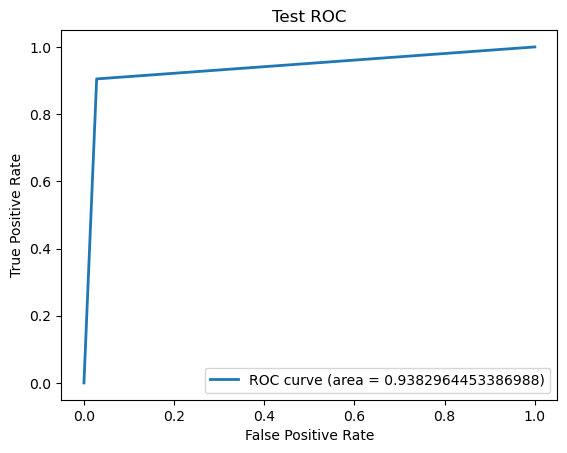

In [4]:
print("Testing data")
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {auc(fpr, tpr)})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.legend(loc="lower right")
plt.show()

Train data


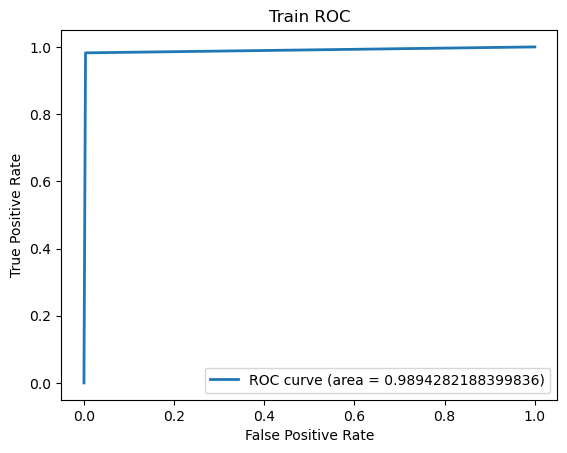

In [5]:
print("Train data")
plt.figure()
plt.plot(fpr_train, tpr_train, lw=2, label=f'ROC curve (area = {auc(fpr_train, tpr_train)})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix Test: 


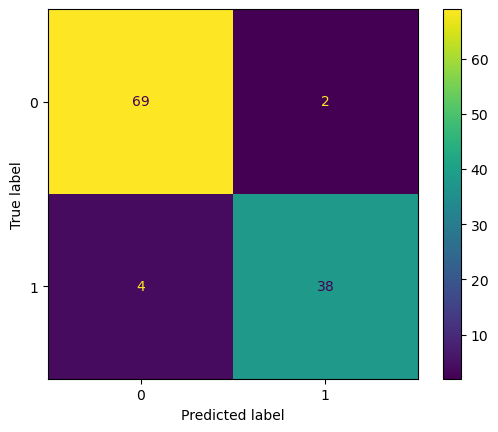

Confusion Matrix Train: 


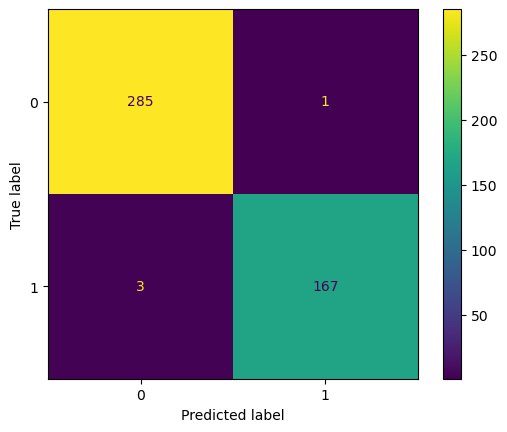

In [6]:
conf = confusion_matrix(test_y,pred_y_test)
print("Confusion Matrix Test: ")
ConfusionMatrixDisplay(confusion_matrix=conf).plot()
plt.show()

conf_tr = confusion_matrix(train_y,pred_y_train)
print("Confusion Matrix Train: ")
ConfusionMatrixDisplay(confusion_matrix=conf_tr).plot()
plt.show()

### 1.b.ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

### 1.b.ii.A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation. 

### 1.b.ii.B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [7]:
data = pd.read_csv('../data/wdbc.data', header=None)
# dropping ID
data = data.iloc[:, 1:]
columns = ['diagnosis']
[columns.append(f'feature#{i}') for i in range(1,31)]
data.columns = columns
data["diagnosis"] = data["diagnosis"].map( {'M':1, 'B':0} )

psTest=[]
rsTest=[]
acsTest=[]
fsTest=[]
aucTest=[]
psTrain=[]
rsTrain=[]
acsTrain=[]
fsTrain=[]
aucTrain=[]

for m in range(30):
    parameters = [{'C': [0.01, 0.1, 1, 10, 100],'max_iter':[2000]}]
    dataX = data.drop(['diagnosis'],axis=1)
    normalized = pd.DataFrame(preprocessing.normalize(dataX))
    data = pd.concat([data[['diagnosis']],normalized],axis=1)
    
    malignFilter = data['diagnosis'] == 1
    benignFilter = data['diagnosis'] == 0
    
    data_malignant = data[malignFilter]
    data_benign = data[benignFilter]

    data_malignant_test = data_malignant.sample(frac=.50,random_state=random.randint(0,100))
    data_benign_test= data_benign.sample(frac=.50,random_state=random.randint(1,100))
    
    # train test data
    test_data = pd.concat([data_malignant_test,data_benign_test]) 
    train_data = data.drop(index = test_data.index)
    
    labelData = train_data
    unlabeledData = test_data.drop('diagnosis',axis=1)
    
    unlabeledDataY = test_data['diagnosis']
    unlabeledDataFinal =unlabeledData.reset_index(drop=True)
    unlabeledData = unlabeledDataFinal
    
    labeledX = train_data.drop(['diagnosis'],axis=1)
    labeledX = labeledX.reset_index(drop=True)
    
    labeledY=train_data['diagnosis']
    labeledY=labeledY.reset_index(drop=True)
    
    labeled_x_final = train_data.drop(['diagnosis'],axis=1)
    labeled_x_final = labeled_x_final.reset_index(drop=True)
    labeled_y_final=train_data['diagnosis']
    labeled_y_final=labeled_y_final.reset_index(drop=True)
    

    for un in range(len(unlabeledData)):
        model = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
        model.fit(labeledX,labeledY)
        l = int(np.argmax(model.decision_function(unlabeledData)))
        maximumDistanceValue = pd.Series.to_frame(unlabeledData.iloc[l,:]).T
        predApp = pd.DataFrame(model.predict(maximumDistanceValue))
        labeledY = pd.concat([labeledY,predApp],axis=0)
        labeledX = labeledX.append(maximumDistanceValue)
        unlabeledData = unlabeledData.drop(index=l,axis=0)
        unlabeledData = unlabeledData.reset_index(drop=True)
    
    #test
    pred_final = model.predict(unlabeledDataFinal)
    psTest.append(precision_score(unlabeledDataY, pred_final))
    rsTest.append(recall_score(unlabeledDataY,pred_final))
    acsTest.append(accuracy_score(unlabeledDataY, pred_final)) 
    fsTest.append(f1_score(unlabeledDataY, pred_final))
    fprTest, tprTest, _ = roc_curve(unlabeledDataY,pred_final)
    aucTest.append(auc(fprTest, tprTest))
    
    
    #train
    pred_final_train=model.predict(labeled_x_final)
    psTrain.append(precision_score(labeled_y_final, pred_final_train))
    rsTrain.append(recall_score(labeled_y_final,pred_final_train))
    acsTrain.append(accuracy_score(labeled_y_final, pred_final_train)) 
    fsTrain.append(f1_score(labeled_y_final, pred_final_train))
    fprTrain, tprTrain, _ = roc_curve(labeled_y_final,pred_final_train)
    aucTrain.append(auc(fprTrain, tprTrain))

print("Test")
print("Average precision score: ", np.mean(psTest))
print("Average f1 score: ", np.mean(fsTest))
print("Average recall score: ", np.mean(rsTest))
print("Average AUC score: ", np.mean(aucTest))
print("Average acuracy score: ", np.mean(acsTest))

print("\nTrain")
print("Average precision score: ", np.mean(psTrain))
print("Average f1 score: ", np.mean(fsTrain))
print("Average recall score: ", np.mean(rsTrain))
print("Average AUC score: ", np.mean(aucTrain))
print("Average acuracy score: ", np.mean(acsTrain))

Test
Average precision score:  0.9172212389534484
Average f1 score:  0.9217886716705646
Average recall score:  0.9270440251572326
Average AUC score:  0.9383347466610134
Average acuracy score:  0.9411971830985915

Train
Average precision score:  0.93383479493417
Average f1 score:  0.9299023366282214
Average recall score:  0.9261006289308173
Average AUC score:  0.9435903517093566
Average acuracy score:  0.9480701754385965


Test AUC


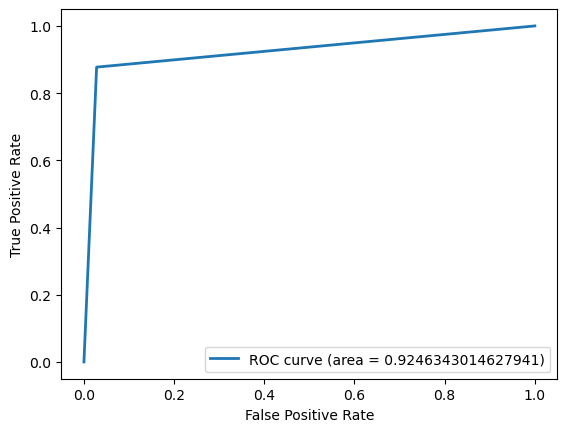

Train AUC


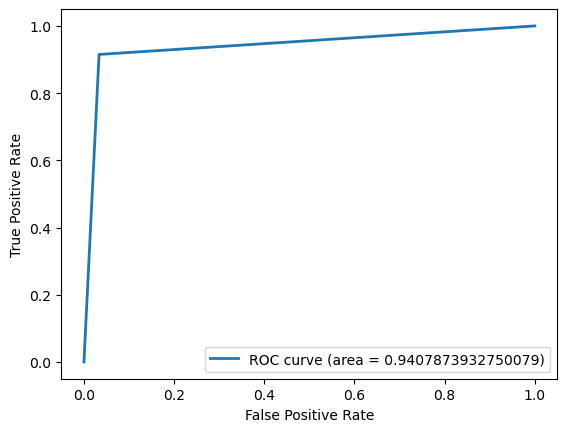

In [8]:
print("Test AUC")
plt.figure()
plt.plot(fprTest, tprTest, lw=2, label=f'ROC curve (area = {auc(fprTest, tprTest)})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print("Train AUC")
plt.figure()
plt.plot(fprTrain, tprTrain, lw=2, label=f'ROC curve (area = {auc(fprTrain, tprTrain)})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix Test: 


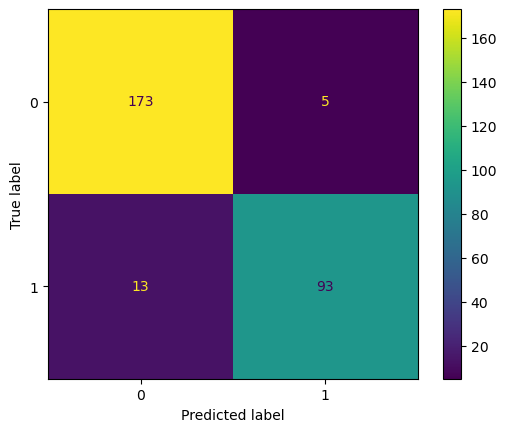

Confusion Matrix Train: 


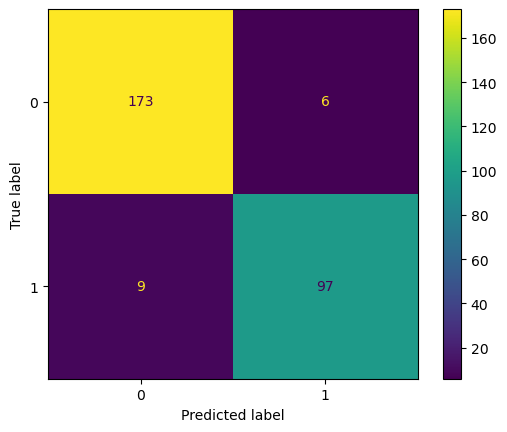

In [9]:
confTest = confusion_matrix(unlabeledDataY, pred_final)
print("Confusion Matrix Test: ")
ConfusionMatrixDisplay(confusion_matrix=confTest).plot()
plt.show()

confTrain = confusion_matrix(labeled_y_final, pred_final_train)
print("Confusion Matrix Train: ")
ConfusionMatrixDisplay(confusion_matrix=confTrain).plot()
plt.show()

### 1.b.iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.
### 1.b.iii.A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?
### 1.b.iii.B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.  
### 1.b.iii.C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

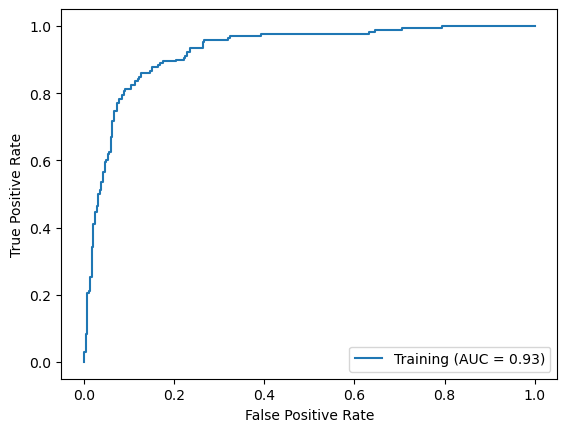

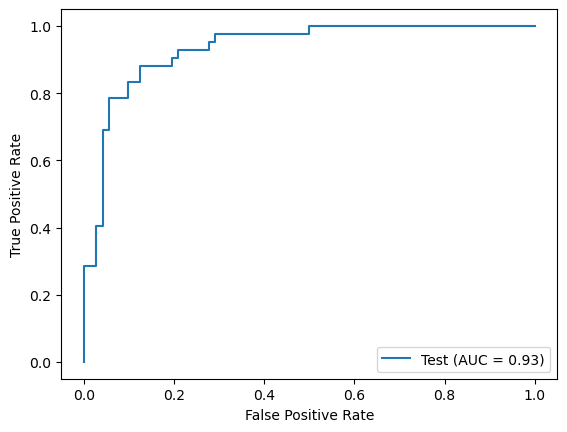



Confusion matrix for training data


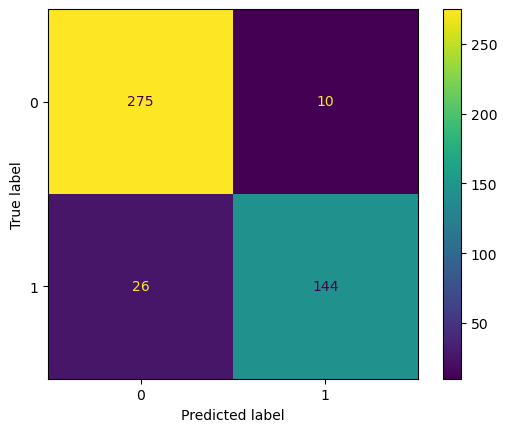



Confusion matrix for test dataset


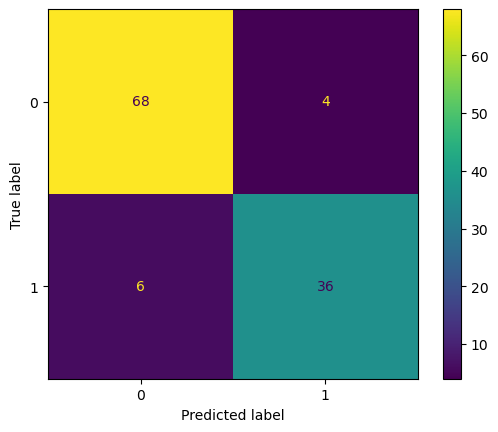

Avg train accuracy:  0.9264468864468864
Avg test accuracy:  0.9280701754385967
Avg train precision:  0.9519919625693429
Avg test precision:  0.9499449594499898
Avg train recall score:  0.8462745098039214
Avg test recall score:  0.8507936507936508
Avg train f1 score:  0.8958014675542283
Avg test f1 score:  0.8967004700199113
Avg train auc:  0.9102717578259374
Avg test auc:  0.9119708994708996


In [10]:
data = pd.read_csv('../data/wdbc.data', header=None)
# dropping ID
data = data.iloc[:, 1:]
columns = ['diagnosis']
[columns.append(f'feature#{i}') for i in range(1,31)]
data.columns = columns
data["diagnosis"] = data["diagnosis"].map( {'M':1, 'B':0} )
X, y = data.iloc[:, 1:], data.iloc[:, 0]

metricData = []

def smFormula(x):
    eX = np.exp(x - np.max(x))
    return eX / eX.sum(axis=0)

randomI = random.randint(0, 29)
for i in range(30):
    randomSeedState = random.randint(0, 402960)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomSeedState, stratify = y)

    # normalizing
    normalizer = MinMaxScaler()
    X_train_std = normalizer.fit_transform(X_train)
    X_test_std = normalizer.transform(X_test)
    X_train = X_train_std
    X_test = X_test_std

    # model
    kMeansModel = KMeans(n_clusters=2, init='random', random_state=randomSeedState)
    kMeansModel.fit(X_train_std)
    labelsClustersTrain = kMeansModel.predict(X_train)
    cDistRes = cdist(X_train, kMeansModel.cluster_centers_, 'euclidean')
    yTrainLabel1 = np.array(y_train)[np.argsort(cDistRes[:, 0], axis=0)[:30]]
    yTrainLabel2 = np.array(y_train)[np.argsort(cDistRes[:, 1], axis=0)[:30]]
    
    # majority polling in order to obtain predcited label for the points
    cluster1Label = Counter(yTrainLabel1).most_common(1)[0][0]
    cluster2Label = Counter(yTrainLabel2).most_common(1)[0][0] 
    
    majorityPolling = np.vectorize(lambda x: cluster1Label if x == 0 else cluster2Label)
    y_pred_train = majorityPolling(labelsClustersTrain)
    
    cDistRes = cdist(X_test, kMeansModel.cluster_centers_, 'euclidean')
    cluster1Distance = cDistRes[:, 0]
    cluster2Distance = cDistRes[:, 1]
    
    y_pred_test = []
    
    for idx, predictedLabel in enumerate(kMeansModel.predict(X_test)):
        if predictedLabel != 0:
            y_pred_test.append(1 if abs(cluster1Distance[idx]) > abs(cluster2Distance[idx]) else 0)
        else:
            y_pred_test.append(0 if abs(cluster1Distance[idx]) < abs(cluster2Distance[idx]) else 1)

    labels = y_pred_test
    majorityLabel = Counter(labels).most_common(1)[0][0]
    
    if majorityLabel == 0:
        y_pred_test = labels
    else:
        update = np.vectorize(lambda x: 1 if x == 0 else 0)
        y_pred_test = update(labels).tolist()
    
    # metrics
    accTrain = accuracy_score(y_train, y_pred_train)
    accTest = accuracy_score(y_test, y_pred_test)
    preTrain = precision_score(y_train, y_pred_train) 
    preTest = precision_score(y_test, y_pred_test)
    recallTrain = recall_score(y_train, y_pred_train) 
    recallTest = recall_score(y_test, y_pred_test)
    f1Train = f1_score(y_train, y_pred_train) 
    f1Test = f1_score(y_test, y_pred_test)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
    aucTrain = auc(fpr_train, tpr_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
    aucTest = auc(fpr_test, tpr_test)
        
    metrics = {
        'accTrain': accTrain,
        'accTest': accTest,
        'preTrain': preTrain,
        'preTest': preTest,
        'recallTrain': recallTrain,
        'recallTest': recallTest,
        'f1Train': f1Train,
        'f1Test': f1Test,
        'aucTrain': aucTrain,
        'aucTest': aucTest,
    }
    
    metricData.append(metrics)
        
    # plotting roc curve on a random iteration
    if(i == randomI):
        distances_train = cdist(X_train, kMeansModel.cluster_centers_,'euclidean')[:, 0]
        distances_test = cdist(X_test, kMeansModel.cluster_centers_,'euclidean')[:, 0]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, smFormula(distances_train))
        aucTrain = auc(fpr_train, tpr_train)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, smFormula(distances_test))
        aucTest = auc(fpr_test, tpr_test)
        RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=aucTrain, estimator_name='Training').plot()
        RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=aucTest, estimator_name='Test').plot()
        plt.show()
        confusionMatTrain = confusion_matrix(y_train, y_pred_train)
        confusionMatTest = confusion_matrix(y_test, y_pred_test)

        print('\n\nConfusion matrix for training data')
        ConfusionMatrixDisplay(confusion_matrix=confusionMatTrain).plot()
        plt.show()

        print('\n\nConfusion matrix for test dataset')
        ConfusionMatrixDisplay(confusion_matrix=confusionMatTest).plot()
        plt.show()
        
  
# calculating and printing average metrics
accTrain = [i['accTrain'] for i in metricData]
accTest = [i['accTest'] for i in metricData]
preTrain = [i['preTrain'] for i in metricData]
preTest = [i['preTest'] for i in metricData]
recallTrain = [i['recallTrain'] for i in metricData]
recallTest = [i['recallTest'] for i in metricData]
f1Train = [i['f1Train'] for i in metricData]
f1Test = [i['f1Test'] for i in metricData]
aucTrain = [i['aucTrain'] for i in metricData]
aucTest = [i['aucTest'] for i in metricData]

print("Avg train accuracy: ", np.mean(accTrain))
print("Avg test accuracy: ", np.mean(accTest))
print("Avg train precision: ", np.mean(preTrain))
print("Avg test precision: ", np.mean(preTest))
print("Avg train recall score: ", np.mean(recallTrain))
print("Avg test recall score: ", np.mean(recallTest))
print("Avg train f1 score: ", np.mean(f1Train))
print("Avg test f1 score: ", np.mean(f1Test))
print("Avg train auc: ", np.mean(aucTrain))
print("Avg test auc: ", np.mean(aucTest))


### 1.b.iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit−predict method.
### 1.b.v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.



Confusion matrix for train


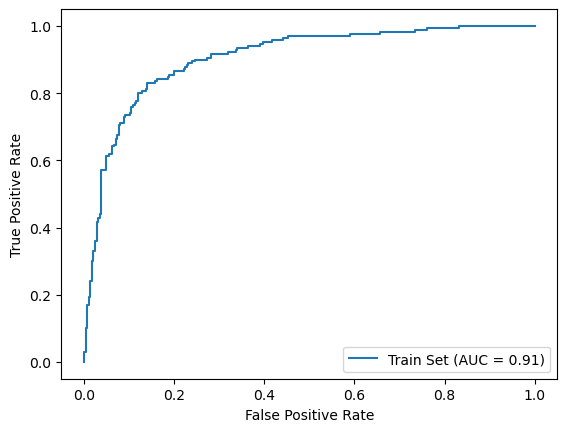

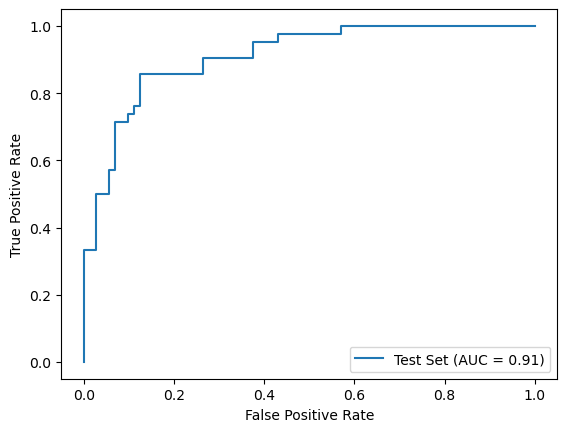

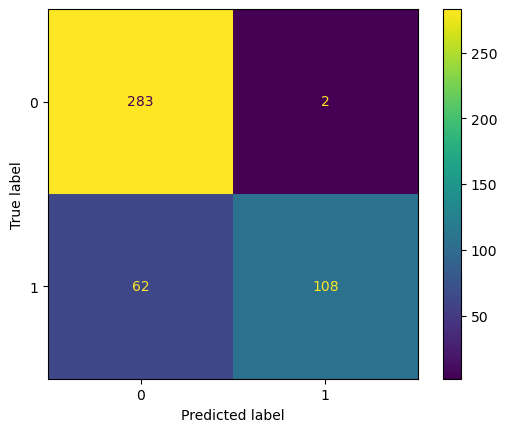



Confusion matrix for test


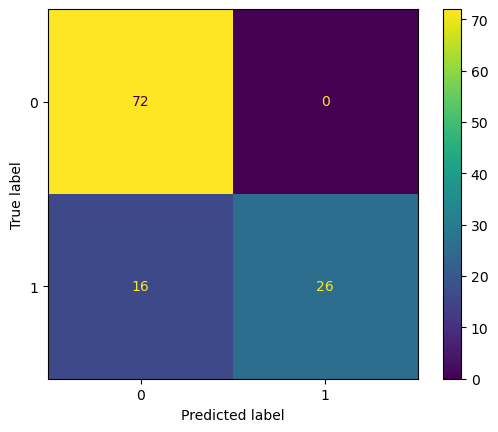

Avg train accuracy:  0.8556043956043956
Avg test accuracy:  0.8616959064327484
Avg train precision:  0.9802405261777803
Avg test precision:  0.9976426799007444
Avg train recall score:  0.6264705882352941
Avg test recall score:  0.6261904761904762
Avg train f1 score:  0.7630157799664309
Avg test f1 score:  0.7642544919852748
Avg train auc:  0.8093756449948398
Avg test auc:  0.8126322751322751


In [11]:
data = pd.read_csv('../data/wdbc.data', header=None)
# dropping ID
data = data.iloc[:, 1:]
columns = ['diagnosis']
[columns.append(f'feature#{i}') for i in range(1,31)]
data.columns = columns
data["diagnosis"] = data["diagnosis"].map( {'M':1, 'B':0} )
X, y = data.iloc[:, 1:], data.iloc[:, 0]

metricData = []

def smFormula(x):
    eX = np.exp(x - np.max(x))
    return eX / eX.sum(axis=0)

randI = random.randint(0, 29) 
for i in range(30):
    randomNumberSeed = random.randint(0, 4029600)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomNumberSeed, stratify = y)
    normalizer = MinMaxScaler()
        
    # normalizing data
    X_train_std = normalizer.fit_transform(X_train)
    X_test_std = normalizer.transform(X_test)    
    X_train = X_train_std
    X_test = X_test_std

    kMeansSpectralModel = SpectralClustering(n_clusters=2, gamma=1, random_state=randomNumberSeed)
    clusterLabels = kMeansSpectralModel.fit_predict(X_train)    
    cluster1Index = np.argwhere(clusterLabels == 1).reshape(-1,)
    cluster2Index = np.argwhere(clusterLabels == 0).reshape(-1,)
    cluster1Label = Counter(np.array(y_train)[cluster1Index]).most_common(1)[0][0]
    cluster2Label = Counter(np.array(y_train)[cluster2Index]).most_common(1)[0][0]
    clusterLabels[cluster1Index] = cluster1Label
    clusterLabels[cluster2Index] = cluster2Label
    y_pred_train = clusterLabels  
    labelClusterTrain = kMeansSpectralModel.fit_predict(X_train_std)
    knnModel = KNeighborsClassifier(n_neighbors=1)
    knnModel.fit(X_train, labelClusterTrain)
    y_pred_test = knnModel.predict(X_test)
    cluster1Index = np.argwhere(y_pred_test == 1).reshape(-1,)
    cluster2Index = np.argwhere(y_pred_test == 0).reshape(-1,)
    cluster1Label = Counter(np.array(y_test)[cluster1Index]).most_common(1)[0][0]
    cluster2Label = Counter(np.array(y_test)[cluster2Index]).most_common(1)[0][0] 
    y_pred_test[cluster1Index] = cluster1Label 
    y_pred_test[cluster2Index] = cluster2Label
    
    distanceTrain = [] 
    distanceTest = []
    
    for c in range(2):
        distanceTrain.append(np.mean(cdist(X_train_std, X_train_std[y_pred_train==c] ,'euclidean'), axis=1))
        distanceTest.append(np.mean(cdist(X_test_std, X_test_std[y_pred_test==c] ,'euclidean'), axis=1))
    
    # metrics
    accTrain = accuracy_score(y_train, y_pred_train)
    accTest = accuracy_score(y_test, y_pred_test)
    preTrain = precision_score(y_train, y_pred_train) 
    preTest = precision_score(y_test, y_pred_test)
    recallTrain = recall_score(y_train, y_pred_train) 
    recallTest = recall_score(y_test, y_pred_test)
    f1Train = f1_score(y_train, y_pred_train) 
    f1Test = f1_score(y_test, y_pred_test)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
    aucTrain = auc(fpr_train, tpr_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
    aucTest = auc(fpr_test, tpr_test)
    
    # plotting roc and cf on random iteration
    if i == randI:
        distances_train = distanceTrain[0]
        distances_test = distanceTest[0]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, smFormula(distances_train))
        auc_train = auc(fpr_train, tpr_train)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, smFormula(distances_test))
        auc_test = auc(fpr_test, tpr_test)
        RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=auc_train, estimator_name='Train Set').plot()
        RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_test, estimator_name='Test Set').plot()
        confusionMatrixTest = confusion_matrix(y_test, y_pred_test)
        confusionMatrixTrain = confusion_matrix(y_train, y_pred_train)
        print('\n\nConfusion matrix for train')
        ConfusionMatrixDisplay(confusion_matrix=confusionMatrixTrain).plot()
        plt.show()
        print('\n\nConfusion matrix for test')
        ConfusionMatrixDisplay(confusion_matrix=confusionMatrixTest).plot()
        plt.show()
        
    metrics = {
        'accTrain': accTrain,
        'accTest': accTest,
        'preTrain': preTrain,
        'preTest': preTest,
        'recallTrain': recallTrain,
        'recallTest': recallTest,
        'f1Train': f1Train,
        'f1Test': f1Test,
        'aucTrain': aucTrain,
        'aucTest': aucTest,
    }
    
    metricData.append(metrics)
    
    
# calculating and printing average metrics
accTrain = [i['accTrain'] for i in metricData]
accTest = [i['accTest'] for i in metricData]
preTrain = [i['preTrain'] for i in metricData]
preTest = [i['preTest'] for i in metricData]
recallTrain = [i['recallTrain'] for i in metricData]
recallTest = [i['recallTest'] for i in metricData]
f1Train = [i['f1Train'] for i in metricData]
f1Test = [i['f1Test'] for i in metricData]
aucTrain = [i['aucTrain'] for i in metricData]
aucTest = [i['aucTest'] for i in metricData]

print("Avg train accuracy: ", np.mean(accTrain))
print("Avg test accuracy: ", np.mean(accTest))
print("Avg train precision: ", np.mean(preTrain))
print("Avg test precision: ", np.mean(preTest))
print("Avg train recall score: ", np.mean(recallTrain))
print("Avg test recall score: ", np.mean(recallTest))
print("Avg train f1 score: ", np.mean(f1Train))
print("Avg test f1 score: ", np.mean(f1Test))
print("Avg train auc: ", np.mean(aucTrain))
print("Avg test auc: ", np.mean(aucTest))

### 2. Active Learning Using Support Vector Machines
### 2.a. Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [12]:
data = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
data.columns=['variance', 'skewness', 'curtosis', 'entropy', 'class']
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### 2.b. Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
### 2.b.i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning
### 2.b.ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning
### 2.b.c. Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.


In [13]:
accuracyData = pd.DataFrame()

for m in range(0,50):
    accuracy =[]
    data= pd.read_csv('../data/data_banknote_authentication.txt', header=None)
    data.columns=['variance', 'skewness', 'curtosis', 'entropy', 'class']

    test_data = data.sample(472,random_state=random.randint(0,28734))
    train_data = data.drop(index=test_data.index)
    test_data = test_data.reset_index(drop=True)
    test_data_x = test_data.drop('class',axis=1)
    test_data_y = test_data['class'] 

    accuDf = pd.DataFrame()
    i = StratifiedKFold(n_splits=90)
    
    train_data_x= train_data.drop(['class'],axis=1)
    train_data_x = train_data_x.reset_index(drop=True)
    train_data_y = train_data['class']
    train_data_y = train_data_y.reset_index(drop=True)
    cvs=5
    
    for train_index,test_index in i.split(train_data_x,train_data_y):
        xSplit = train_data_x.iloc[test_index]
        ySplit = train_data_y.iloc[test_index]
        tempDf= pd.concat([xSplit,ySplit],axis=1)
        accuDf = pd.concat([accuDf,tempDf],axis=0)
        accuDfX = accuDf.drop('class',axis=1)
        accuDfY = accuDf['class']
        parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'max_iter':[2000]}]
        model = GridSearchCV(LinearSVC(penalty='l1',loss='squared_hinge',dual=False), parameters, cv=cvs)
        cvs=10
        model.fit(accuDfX,accuDfY)
        pred_y = model.predict(test_data_x)
        accuracy.append(accuracy_score(test_data_y,pred_y))
    
    colVals = pd.Series(accuracy)
    accuracyData.insert(loc=m, column=m, value=colVals)

In [14]:
print('Average test error for passive: ')

avg_value_passive = pd.DataFrame(accuracyData.mean(axis=1))
avg_value_passive[0] = avg_value_passive[0].apply(lambda x: 1-x)
avg_value_passive

Average test error for passive: 


,0
0,0.157585
1,0.073517
2,0.063136
3,0.047331
4,0.031737
...,...
85,0.010381
86,0.010212
87,0.010085
88,0.010297


In [15]:
accuracyData1 = pd.DataFrame()
for m in range(0,50):
    accuracy1=[]
    data= pd.read_csv('../data/data_banknote_authentication.txt',header=None)
    data.columns=['variance', 'skewness', 'curtosis', 'entropy', 'class']

    test_data = data.sample(472,random_state=random.randint(0,23478))

    train_data = data.drop(index=test_data.index)
    test_data = test_data.reset_index(drop=True)
    test_data_x = test_data.drop('class',axis=1)
    test_data_y = test_data['class'] 

    accuDf=pd.DataFrame()
    i = StratifiedKFold(n_splits=90)
    train_data_x= train_data.drop(['class'],axis=1)
    train_data_x = train_data_x.reset_index(drop=True)
    train_data_y = train_data['class']
    train_data_y = train_data_y.reset_index(drop=True)
    cvs=5

    for train_index,test_index in i.split(train_data_x,train_data_y):
        splitX = train_data_x.iloc[test_index] 
        splitY = train_data_y.iloc[test_index]
        tempDf= pd.concat([splitX,splitY],axis=1)
        accuDf = pd.concat([accuDf,tempDf],axis=0)
        accuDfX = accuDf.drop('class',axis=1)
        accuDfY = accuDf['class']
        break
    
    for i in range(1,90):
        parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'max_iter':[2000]}]
        model = GridSearchCV(LinearSVC(penalty='l1',loss='squared_hinge',dual=False), parameters,cv=5)
        model.fit(accuDfX,accuDfY)
        train_data_x= train_data_x.reset_index(drop=True)
        distDf =  pd.DataFrame(abs(model.decision_function(train_data_x)))
        distDf = distDf.sort_values(0)
        distDf = distDf.iloc[0:10,]
        tempDf = train_data.iloc[distDf.index,:]
        train_data_x= train_data_x.drop(index = distDf.index)
        pred_y = model.predict(test_data_x)
        accuracy1.append(accuracy_score(test_data_y,pred_y))
        accuDf = pd.concat([accuDf,tempDf],axis=0)    
        accuDf.reset_index(drop=True,inplace=True)
        accuDfX = accuDf.drop('class',axis=1)
        accuDfY = accuDf['class']

    colVals = pd.Series(accuracy1)
    accuracyData1.insert(loc=m, column=m, value=colVals)

In [16]:
print('Average test error for active: ')

avg_value_active = pd.DataFrame(accuracyData1.mean(axis=1))
avg_value_active[0] = avg_value_active[0].apply(lambda x: 1-x)
avg_value_active

Average test error for active: 


,0
0,0.144788
1,0.034831
2,0.030297
3,0.025000
4,0.025551
...,...
84,0.012203
85,0.012331
86,0.012966
87,0.013051


Text(0.5, 0, 'Number of training instances')

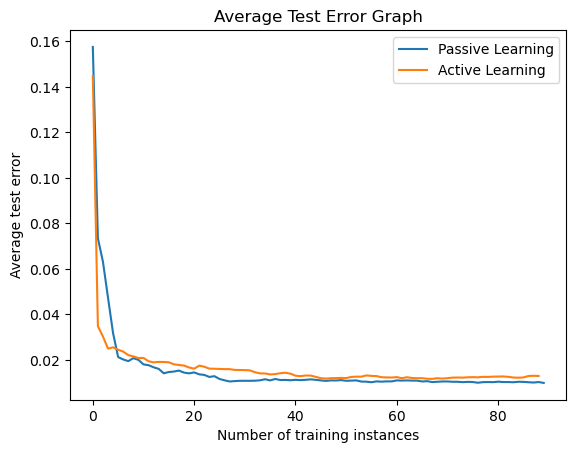

In [17]:
avg_value_passive = np.mean(accuracyData,axis=1)
accuracyData1.reset_index(drop=True,inplace=True)
avg_value_active = np.mean(accuracyData1,axis=1)

p = pd.DataFrame({'Passive Learning': 1-avg_value_passive , 'Active Learning':1-avg_value_active})
ax = p.plot(title='Average Test Error Graph')
ax.set_ylabel("Average test error")
ax.set_xlabel("Number of training instances")

From the above graph, it is evident that the active learning model requires more time to reach a low test error. This is because we only chose the 10 nearest values in each run in the case of active learning. On the contrary, in the case of passive learning, random values are chosen which results in the values covering a larger span of data.